# Topo plots

In [44]:
import numpy as np
import xarray as xr
import ipywidgets as widgets
%matplotlib inline

In [59]:
topo = xr.open_dataset('../topo/topo.nc')
topo

<xarray.Dataset>
Dimensions:     (x: 225, y: 157)
Coordinates:
  * y           (y) float32 4775710.0 4775700.0 ... 4774160.0 4774150.0
  * x           (x) float32 516030.0 516040.0 516050.0 ... 518260.0 518270.0
Data variables:
    veg_height  (y, x) float32 ...
    dem         (y, x) float32 ...
    veg_type    (y, x) uint32 ...
    mask        (y, x) uint8 ...
    veg_k       (y, x) float32 ...
    veg_tau     (y, x) float32 ...
    projection  |S1 ...
Attributes:
    last_modified:       [2019-11-14 20:40:34] Data added or updated
    Conventions:         CF-1.6
    dateCreated:         2019-11-14 20:40:34
    Title:               Topographic Images for SMRF/AWSM
    history:             [2019-11-14 20:40:34] Create netCDF4 file using Basi...
    institution:         USDA Agricultural Research Service, Northwest Waters...
    generation_command:  /usr/local/bin/basin_setup -f delineation/basin_outl...

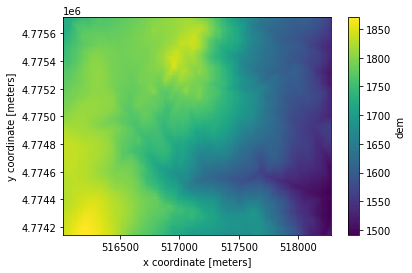

In [58]:
topo.dem.plot()

In [ ]:
topo.veg_type.plot()

In [ ]:
topo.veg_height.plot()

In [67]:
# maxus
# negative maxus are exposed, positive are sheltered
maxus = xr.open_dataset('../topo/maxus_30window.nc')

direction_select_slider = widgets.SelectionSlider(
    options=maxus.direction.values,
    layout={'width': '500px'},
    orientation='horizontal',
    readout=True
)

def display_data(direction):
    idx = np.where(maxus.direction == direction)[0][0]
    maxus.sel(Direction=idx).maxus.plot(
        figsize=(20,10),
        aspect='equal'
    )

%matplotlib inline
widgets.interact(
    display_data,
    direction=direction_select_slider
)

interactive(children=(SelectionSlider(description='direction', layout=Layout(width='500px'), options=(0, 5, 10…

<function __main__.display_data(direction)>

In [73]:
# tbreak
# negative maxus are exposed, positive are sheltered
tbreak = xr.open_dataset('../topo/tbreak_30window.nc')
direction_select_slider = widgets.SelectionSlider(
    options=tbreak.direction.values,
    layout={'width': '500px'},
    orientation='horizontal',
    readout=True
)

def display_data(direction):
    idx = np.where(tbreak.direction == direction)[0][0]
    tbreak.sel(Direction=idx).tbreak.plot(
        figsize=(20,10),
        aspect='equal'
    )

%matplotlib inline
widgets.interact(
    display_data,
    direction=direction_select_slider
)

interactive(children=(SelectionSlider(description='direction', layout=Layout(width='500px'), options=(0, 5, 10…

<function __main__.display_data(direction)>

In [52]:
tbreak

<xarray.Dataset>
Dimensions:    (Direction: 72, x: 225, y: 157)
Coordinates:
  * y          (y) float32 4775710.0 4775700.0 4775690.0 ... 4774160.0 4774150.0
  * x          (x) float32 516030.0 516040.0 516050.0 ... 518260.0 518270.0
Dimensions without coordinates: Direction
Data variables:
    direction  (Direction) int32 0 5 10 15 20 25 30 ... 330 335 340 345 350 355
    tbreak     (Direction, y, x) float32 ...
Attributes:
    dateCreated:  2020-11-25T16:55:10.010517